Reproduce Fig2 

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
fig_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fig_drafts\\'

### Get the data

In [3]:
results_folder = 'E:\\projects_q_30_10_2024\\isttc\\results\\monkey\\fixation_period_1000ms\\'

pfdl_constrained_data_acf_binned_1000_df = pd.read_pickle(results_folder + 'pfdl_constrained_data_acf_binned_1000_df.pkl')
pfp_constrained_data_acf_binned_1000_df = pd.read_pickle(results_folder + 'pfp_constrained_data_acf_binned_1000_df.pkl')

In [6]:
pfdl_constrained_data_acf_binned_1000_df

,unit_id,n_trials,n_trials_more_20,no_zero_bins,one_hz_activity
0,0,92,True,1,1
1,1,41,True,0,0
2,2,60,True,0,1
3,3,91,True,1,1
4,4,108,True,1,1
...,...,...,...,...,...
538,539,68,True,1,1
539,540,45,True,0,1
540,541,107,True,1,1
541,542,86,True,1,1


In [17]:
def get_reduction_df(constrained_data_acf_binned_1000_df):
    one_c = len(constrained_data_acf_binned_1000_df.query('n_trials_more_20 == True'))
    two_c = len(constrained_data_acf_binned_1000_df.query('n_trials_more_20 == 1 and no_zero_bins == 1'))
    three_c = len(constrained_data_acf_binned_1000_df.query('n_trials_more_20 == 1 and no_zero_bins == 1 and one_hz_activity == 1'))
    
    reduction_df = pd.DataFrame(np.vstack((['0', '1', '2', '3'], [len(constrained_data_acf_binned_1000_df), one_c, two_c, three_c])).T, 
                                columns=['n_constraints', 'n_units'])
    reduction_df['n_constraints'] = reduction_df['n_constraints'].astype(int)
    reduction_df['n_units'] = reduction_df['n_units'].astype(int)
    return reduction_df

In [19]:
pfdl_reduction_df = get_reduction_df(pfdl_constrained_data_acf_binned_1000_df)
pfdl_reduction_df['area'] = 'pfdl'
pfdl_reduction_df

,n_constraints,n_units,area
0,0,543,pfdl
1,1,499,pfdl
2,2,382,pfdl
3,3,367,pfdl


In [21]:
pfp_reduction_df = get_reduction_df(pfp_constrained_data_acf_binned_1000_df)
pfp_reduction_df['area'] = 'pfp'
pfp_reduction_df

,n_constraints,n_units,area
0,0,543,pfp
1,1,463,pfp
2,2,330,pfp
3,3,318,pfp


### Plot

In [38]:
save_fig = True

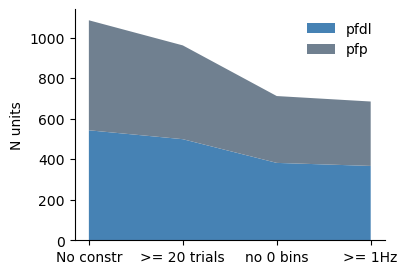

In [39]:
fig, axes = plt.subplots(1,1, figsize=(4,3))

axes.stackplot(pfdl_reduction_df['n_constraints'].values, 
               pfdl_reduction_df['n_units'].values, pfp_reduction_df['n_units'].values, 
               colors =['steelblue', 'slategray'], labels=['pfdl', 'pfp'])

axes.set_xticks([0,1,2,3])
axes.set_xticklabels(['No constr','>= 20 trials','no 0 bins','>= 1Hz'])

axes.set_ylabel('N units')

axes.legend(frameon=False)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'constraints_on_data.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'constraints_on_data.svg', bbox_inches='tight')